### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
import tensorflow as tr
from tensorflow import keras
import tensorflow.keras.layers as k

### Data

In [2]:
from keras_preprocessing.image import ImageDataGenerator, load_img

#### with target size

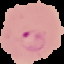

In [3]:
load_img("Data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png",target_size=(64,64))

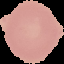

In [4]:
load_img("Data/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png",target_size=(64,64))

#### without target size

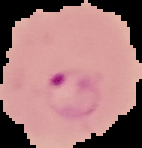

In [5]:
load_img("Data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png")

In [6]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [7]:
image_dir='Data/cell_images/'
size=64
dataset=[]
labels=[]

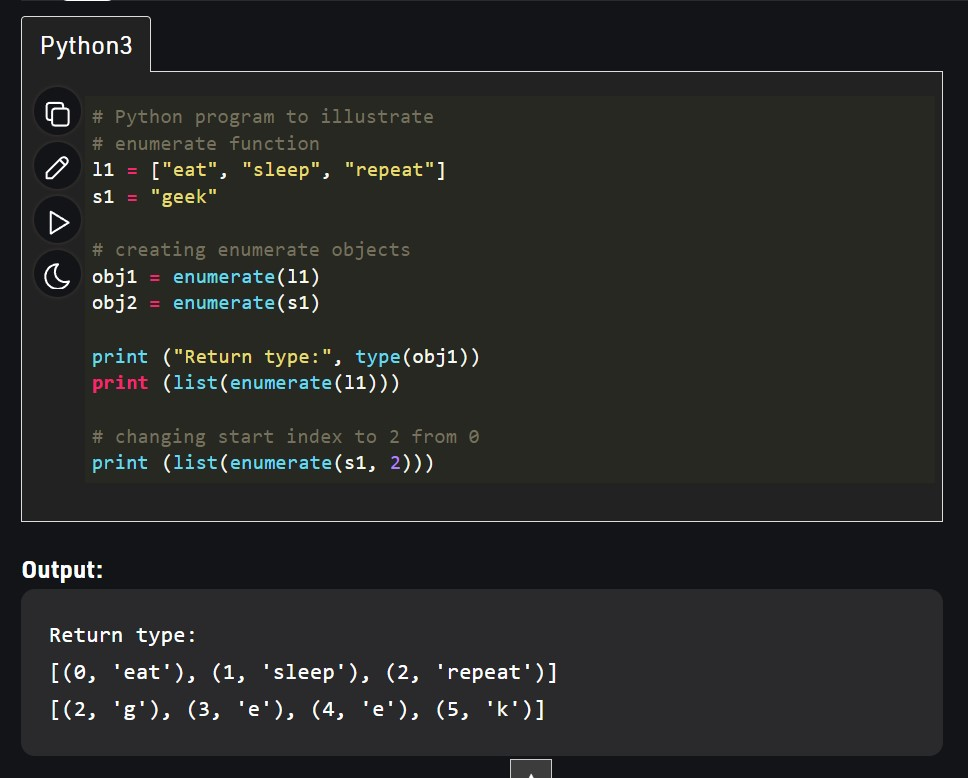

In [8]:
parasitized_img=os.listdir(image_dir+'Parasitized/')

for i,img_name in enumerate(parasitized_img):
    if (img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'Parasitized/'+img_name)
        image =Image.fromarray(image,'RGB')
        image= image.resize((size,size))
        
        dataset.append(np.array(image))
        labels.append(0)

In [9]:
len(parasitized_img)

13780

In [10]:
Uninfected_img=os.listdir(image_dir+'Uninfected/')

for i,img_name in enumerate(Uninfected_img):
    if (img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'Uninfected/'+img_name)
        image =Image.fromarray(image,'RGB')
        image= image.resize((size,size))
        
        dataset.append(np.array(image))
        labels.append(1)

In [11]:
len(Uninfected_img)

13780

In [12]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(labels)),test_size=0.2,random_state=0)

### CNN model Architecture

In [13]:
input_shape=(size,size,3)
inp=k.Input(shape=input_shape)

conv1=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norml1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norml1)

conv2=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norml2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norml2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation='relu')(flat)
norml3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norml3)

hidden2=k.Dense(256,activation='relu')(drop3)
norml4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norml4)

out=k.Dense(2,activation='sigmoid')(drop4)

In [14]:
model=keras.Model(inputs=inp, outputs=out)

model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [15]:
history=model.fit(np.array(xtrain),ytrain,batch_size=64,verbose=1,epochs=5,validation_split=0.1)

Epoch 1/5
311/311 [==============================] - 41s 127ms/step - loss: 0.4750 - accuracy: 0.7884 - val_loss: 2.2667 - val_accuracy: 0.6957
Epoch 2/5
311/311 [==============================] - 39s 126ms/step - loss: 0.2357 - accuracy: 0.9123 - val_loss: 0.2433 - val_accuracy: 0.9193
Epoch 3/5
311/311 [==============================] - 39s 126ms/step - loss: 0.1908 - accuracy: 0.9311 - val_loss: 0.2727 - val_accuracy: 0.9075
Epoch 4/5
311/311 [==============================] - 39s 126ms/step - loss: 0.1713 - accuracy: 0.9370 - val_loss: 0.2467 - val_accuracy: 0.9252
Epoch 5/5
311/311 [==============================] - 39s 125ms/step - loss: 0.1565 - accuracy: 0.9427 - val_loss: 0.1643 - val_accuracy: 0.9433


In [16]:
print('Test Accuracy:{:.2f}%'.format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

173/173 [==============================] - 3s 17ms/step - loss: 0.1738 - accuracy: 0.9421
Test Accuracy:94.21%


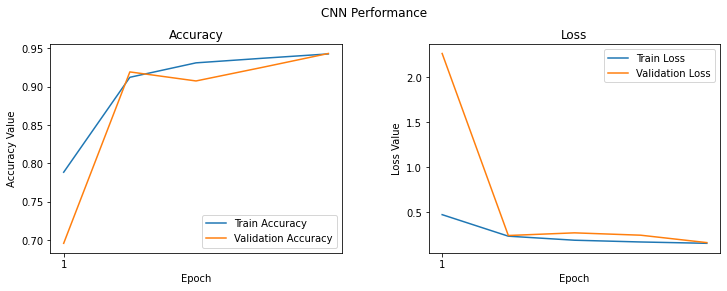

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1

epoch_list = list(range(1,max_epoch) )

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))

ax1.set_ylabel('Accuracy Value')

ax1.set_xlabel('Epoch')

ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))

ax2.set_ylabel('Loss Value')

ax2.set_xlabel('Epoch')

ax2.set_title('Loss')

l2 = ax2.legend(loc="best")
